- Use the Elbow Method to find the best number of clusters (K).
- Initialize K-Means with K centroids.
- Assign points to nearest centroid based on Euclidean distance.
- Update centroids by computing the mean of cluster points.
- Repeat steps 3 and 4 until convergence.
- Final clusters are formed!

In [2]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np 

In [76]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [77]:
X

array([[ 6.40319188, -7.52100042],
       [ 5.1981562 , -2.5948148 ],
       [-0.03460561, -5.93855632],
       ...,
       [ 1.41549507, -8.3672313 ],
       [ 0.53894821, -7.54686312],
       [ 1.99717037, -5.52247799]])

In [78]:
y

array([2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2,
       1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2,
       1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2,
       2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2,

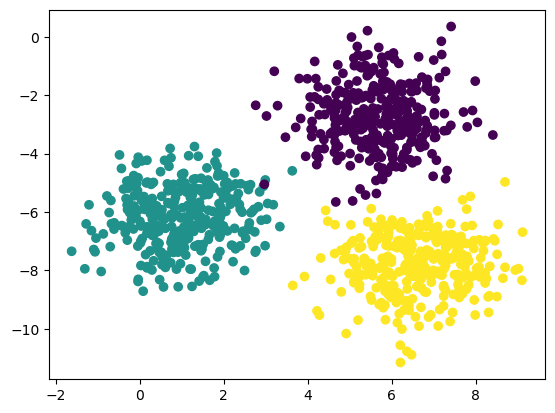

In [79]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
## before standardisation we need to do train test spit to avoid data leakage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
from sklearn.cluster import KMeans

In [84]:
## Elbow method to select the K value 
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [85]:
wcss

[1340.0,
 800.9108731515097,
 226.19745157095915,
 192.58655171148993,
 162.53918065088422,
 152.7308991176888,
 119.46893941785503,
 105.7801772314929,
 93.43484844280283,
 87.29168972333066]

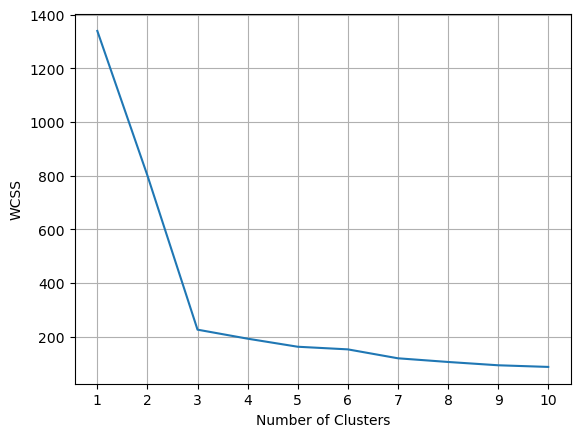

In [86]:
## plot the elbow curve 
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [90]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [96]:
y_pred = kmeans.predict(X_test_scaled)

In [98]:
y_pred

array([0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0,
       1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2,
       1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0,
       2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

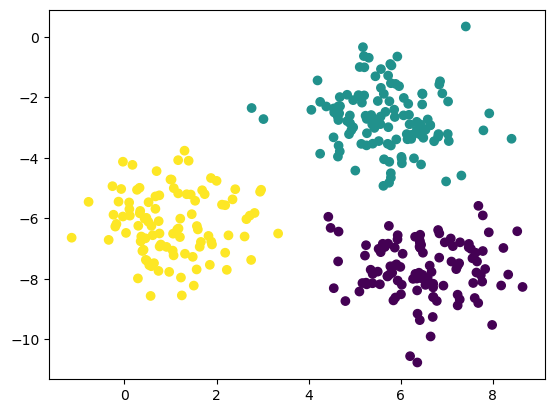

In [100]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [104]:
## Validating the k value

In [106]:
## Kneelocator
## shilhoute scoring

In [108]:
### kneelocator
!pip install kneed

In [120]:
from kneed import KneeLocator

In [124]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [126]:
kl.elbow

3

In [130]:
### silhoutte score 
from sklearn.metrics import silhouette_score

In [136]:
silhouette_coefficiants = []
for k in range(2,11): 
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficiants.append(score)

In [138]:
silhouette_coefficiants

[0.46089630416448596,
 0.6463667078198586,
 0.5311423781588055,
 0.44502619714657865,
 0.44847341564969795,
 0.4165634685929959,
 0.346034859090547,
 0.3508421492458171,
 0.34384615912752414]

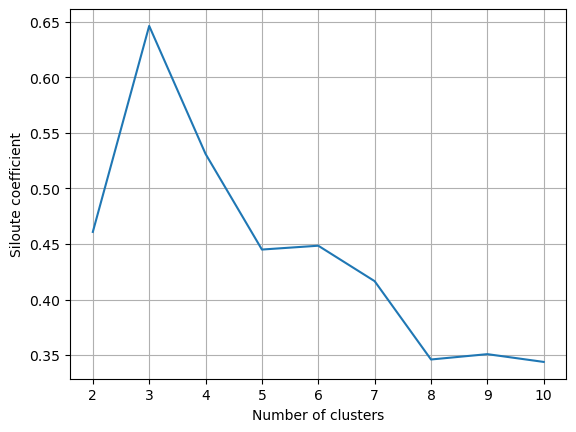

In [142]:
plt.plot(range(2,11), silhouette_coefficiants)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Siloute coefficient')
plt.grid()
plt.show()